In [4]:
import pandas as pd

heart_attack_data = pd.read_csv('heart_attack_prediction_dataset.csv')
heart_attack_data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
heart_attack_data['Diet'] = heart_attack_data['Diet'].map(ordinal_map)

ordinal_map_sex = {'Male':1, 'Female':0}
heart_attack_data['Sex'] = heart_attack_data['Sex'].map(ordinal_map_sex)

In [6]:
#str = 180/120 = ["180", "120"]
heart_attack_data[['BP_Systolic', 'BP_Diastolic']] = heart_attack_data['Blood Pressure'].str.split('/', expand=True)

# Convert the columns to numeric
heart_attack_data['BP_Systolic'] = pd.to_numeric(heart_attack_data['BP_Systolic'])
heart_attack_data['BP_Diastolic'] = pd.to_numeric(heart_attack_data['BP_Diastolic'])

heart_attack_data = heart_attack_data.drop("Blood Pressure", axis = 1)

heart_attack_data = heart_attack_data.drop(columns=['Country', 'Continent','Hemisphere'])

In [7]:
# Checking Datatypes

heart_attack_data.dtypes

Patient ID                          object
Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
BP_Systolic                          int64
BP_Diastoli

In [8]:
heart_attack_data.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
BP_Systolic                        0
BP_Diastolic                       0
dtype: int64

In [9]:
# Choose target and features

X = heart_attack_data[['Sex', 'Age', 'Cholesterol', 'Heart Rate','Diabetes', 'Family History','BP_Systolic','BP_Diastolic',
                        'Smoking', 'Obesity','Alcohol Consumption', 'Diet', 'Exercise Hours Per Week',
                        'Previous Heart Problems', 'Medication Use', 'Triglycerides', 'Sleep Hours Per Day']]
        
y=heart_attack_data['Heart Attack Risk'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

classifier_3 = KNeighborsClassifier(n_neighbors=3)
classifier_5 = KNeighborsClassifier(n_neighbors=5)
classifier_7 = KNeighborsClassifier(n_neighbors=7)
classifier_12 = KNeighborsClassifier(n_neighbors=12)

In [16]:
# Fit Model
classifier_3.fit(X_train, y_train)
classifier_5.fit(X_train, y_train)
classifier_7.fit(X_train, y_train)
classifier_12.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [17]:
# Predict the test set results
y_pred_3 = classifier_3.predict(X_test)
y_pred_5 = classifier_5.predict(X_test)
y_pred_7 = classifier_7.predict(X_test)
y_pred_12 = classifier_12.predict(X_test)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[[807 335]
 [448 163]]
0.5533371363377068
[[847 295]
 [469 142]]
0.5641756988020536
[[898 244]
 [482 129]]
0.5858528237307473


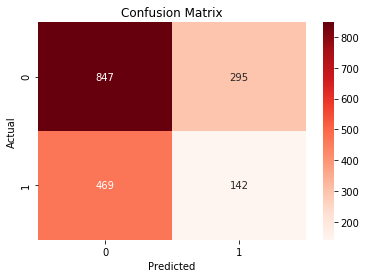

In [21]:
# Evaluate Model

cm_KNN = confusion_matrix(y_test, y_pred_3)
print (cm_KNN)
print(accuracy_score(y_test, y_pred_3))

cm_KNN = confusion_matrix(y_test, y_pred_5)
print (cm_KNN)
print(accuracy_score(y_test, y_pred_5))

cm_KNN = confusion_matrix(y_test, y_pred_7)
print (cm_KNN)
print(accuracy_score(y_test, y_pred_7))

cm_KNN = confusion_matrix(y_test, y_pred_5)
acc_KNN = accuracy_score(y_test, y_pred_5)
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# True Positives (142): These are individuals correctly predicted to be at risk for heart attack.
#True Negatives (847): These are individuals correctly predicted to not be at risk for a heart attack.
#False Positives (295): These are individuals incorrectly predicted to be at risk for heart attack.
#False Negatives (469): These are individuals incorrectly predicted to not be at risk for a heart attack.